# Assignment 1 - Part A

In this assignment you will import and explore/analyze a **Wine wineset** for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. 
You already worked your way through a few tutorials and her you can integrate your learned knowledge

For this assignment you will use the **Wine wineset** that is on of the smaller classification winesets that are implemented in sklearn https://scikit-learn.org/stable/winesets/toy_wineset.html
(Next assignment we will use a larger real-world wineset)

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the wine.
3. Explore the wine to gain insights.
4. Prepare the wine to better expose the underlying wine patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions

In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.

At the end you have to hand in this notebook together with the notebook of part B, when you hand it in you should make sure that you saved it with all output visible. So we can evaluate your notebooks output without directly ruinning it.
In addition (to be sure) you should also save a pdf of the final result.


```
Imad Hanzaz, Yannick Urselmann, Jaylong Verschuren
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

**The problem is grouping wines in good and bad based on the chemical characteristics.**

- First we import the necessary libraries and load the wine set into the variable 'wine'.
- Then we visualize the wineset.

# 2. Get the wine.

Initialize the system, get all needed libraries, retreive the wine and import it

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [419]:
wine = pd.read_csv("./winequality-red.csv",sep=";")

```
# Place your comments / conclusions / insight here
```


In [420]:
wine

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 3. Explore the wine to gain insights.

Explore the wine in any possible way, visualize the results (if you have multiple plots of the same kind of wine put them in one larger plot)

### Methods from tutorial 1 and 2 ###

In [421]:
wine.columns.tolist()

['fixedacidity',
 'volatileacidity',
 'citricacid',
 'residualsugar',
 'chlorides',
 'freesulfurdioxide',
 'totalsulfurdioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [422]:
wine.isnull().sum()

fixedacidity          0
volatileacidity       0
citricacid            0
residualsugar         0
chlorides             0
freesulfurdioxide     0
totalsulfurdioxide    0
density               0
pH                    0
sulphates             0
alcohol               0
quality               0
dtype: int64

In [423]:
def plotMatrix(wine):
  fig, ax = plt.subplots()
  # Using matshow here just because it sets the ticks up nicely. imshow is faster.
  ax.matshow(wine, cmap='viridis')
  for (i, j), z in np.ndenumerate(wine):
     ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
  plt.show()



print (wine.loc[20])
print (wine.shape)



fixedacidity           8.9000
volatileacidity        0.2200
citricacid             0.4800
residualsugar          1.8000
chlorides              0.0770
freesulfurdioxide     29.0000
totalsulfurdioxide    60.0000
density                0.9968
pH                     3.3900
sulphates              0.5300
alcohol                9.4000
quality                6.0000
Name: 20, dtype: float64
(1599, 12)


In [424]:
print(wine.describe())

       fixedacidity  volatileacidity   citricacid  residualsugar    chlorides  \
count   1599.000000      1599.000000  1599.000000    1599.000000  1599.000000   
mean       8.319637         0.527821     0.270976       2.538806     0.087467   
std        1.741096         0.179060     0.194801       1.409928     0.047065   
min        4.600000         0.120000     0.000000       0.900000     0.012000   
25%        7.100000         0.390000     0.090000       1.900000     0.070000   
50%        7.900000         0.520000     0.260000       2.200000     0.079000   
75%        9.200000         0.640000     0.420000       2.600000     0.090000   
max       15.900000         1.580000     1.000000      15.500000     0.611000   

       freesulfurdioxide  totalsulfurdioxide      density           pH  \
count        1599.000000         1599.000000  1599.000000  1599.000000   
mean           15.874922           46.467792     0.996747     3.311113   
std            10.460157           32.895324    

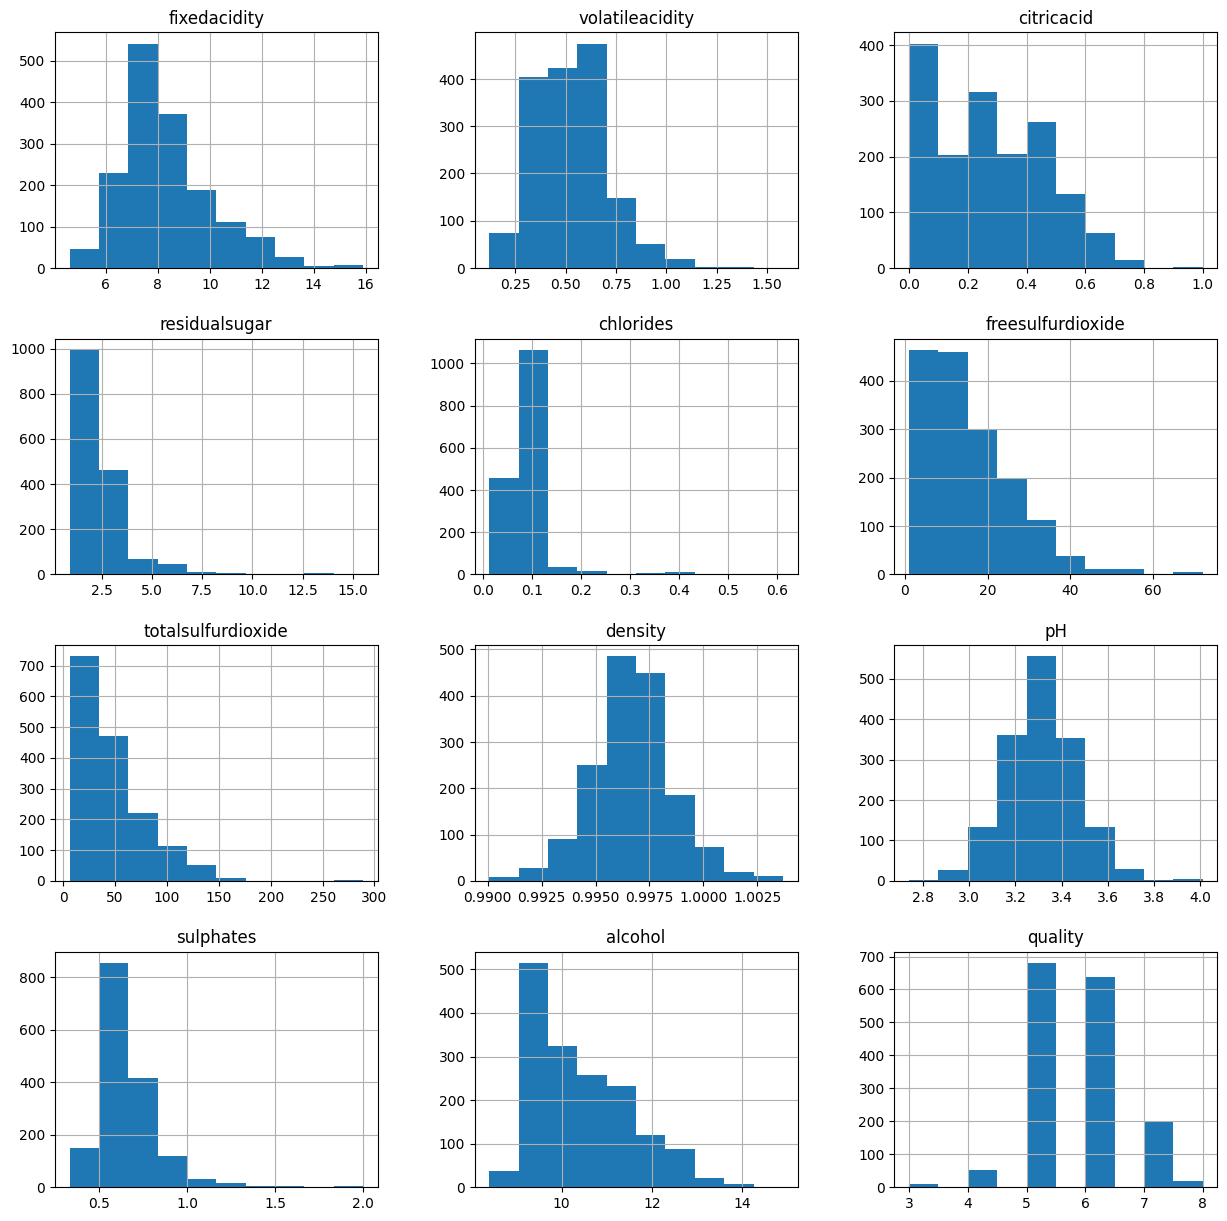

In [425]:


wine.hist(figsize=(15,15))
plt.show()



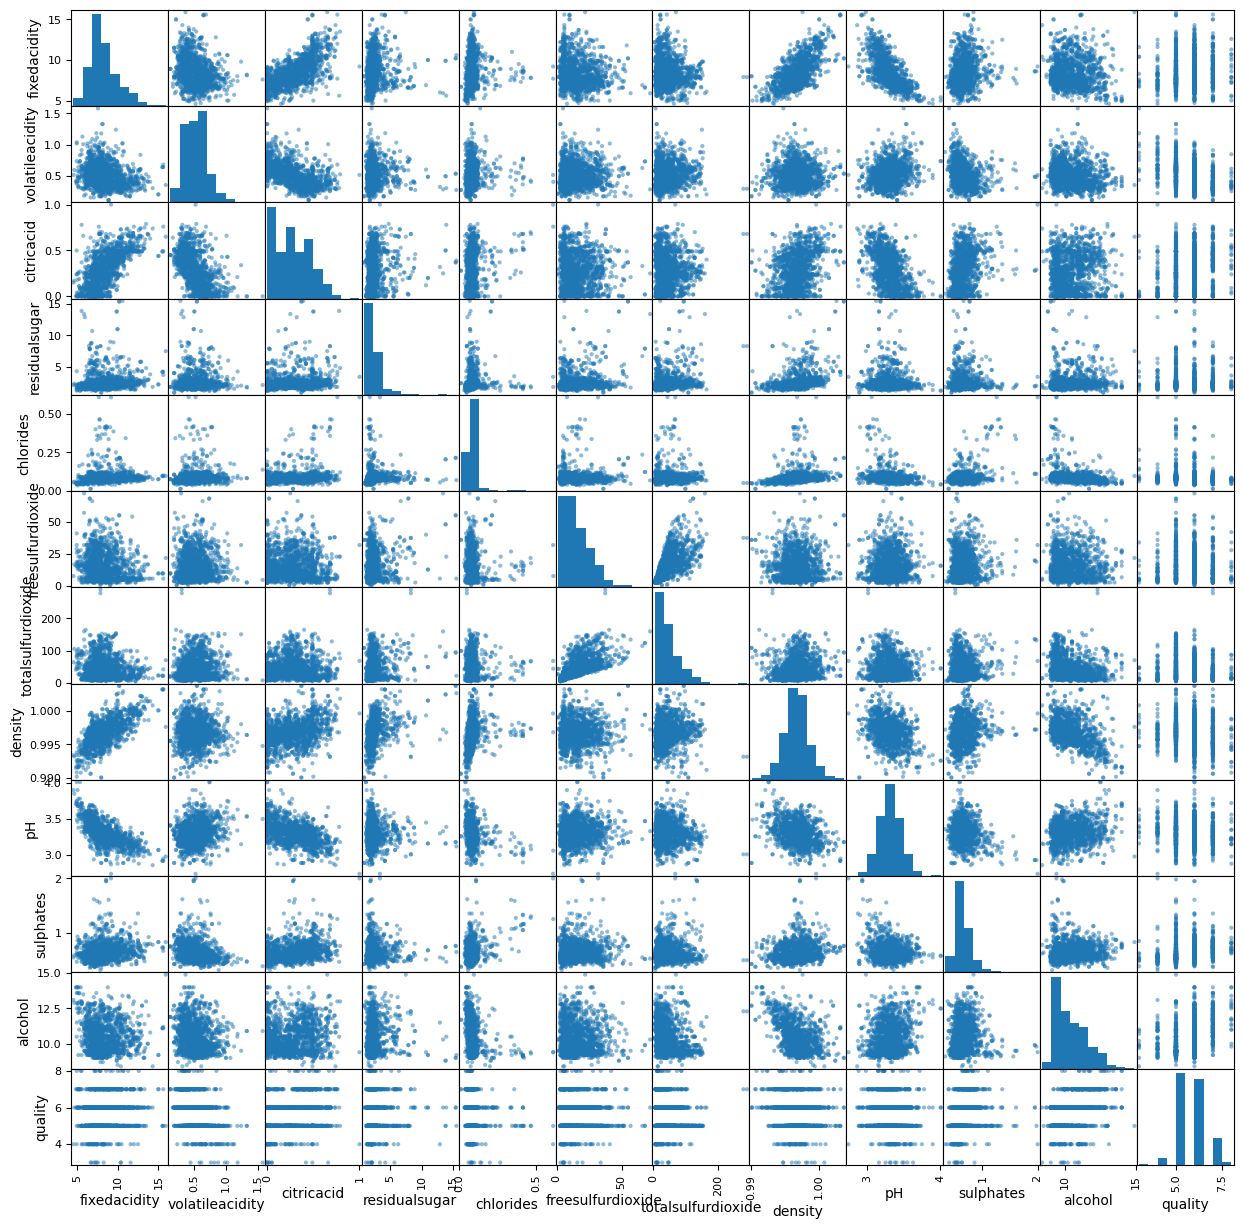

In [426]:
from pandas.plotting import scatter_matrix

scatter_matrix(wine, figsize=(15,15))
plt.show()



In [427]:
corrmat = wine.corr()

corrmat.style.background_gradient(cmap='viridis').set_precision(4)


C:\Users\Jaylo\AppData\Local\Temp\ipykernel_22172\69872632.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrmat.style.background_gradient(cmap='viridis').set_precision(4)


,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
fixedacidity,1.0000,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatileacidity,-0.2561,1.0000,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citricacid,0.6717,-0.5525,1.0000,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residualsugar,0.1148,0.0019,0.1436,1.0000,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,1.0000,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
freesulfurdioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,1.0000,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
totalsulfurdioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,1.0000,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,1.0000,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,1.0000,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,1.0000,0.0936,0.2514


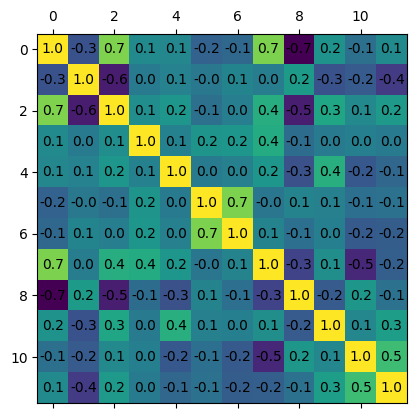

In [428]:
plotMatrix(corrmat)

# 4. Prepare the wine to better expose the underlying wine patterns to Machine Learning algorithms

prepare your wine, is it normalized? are there outlier? Make a training and a test set.

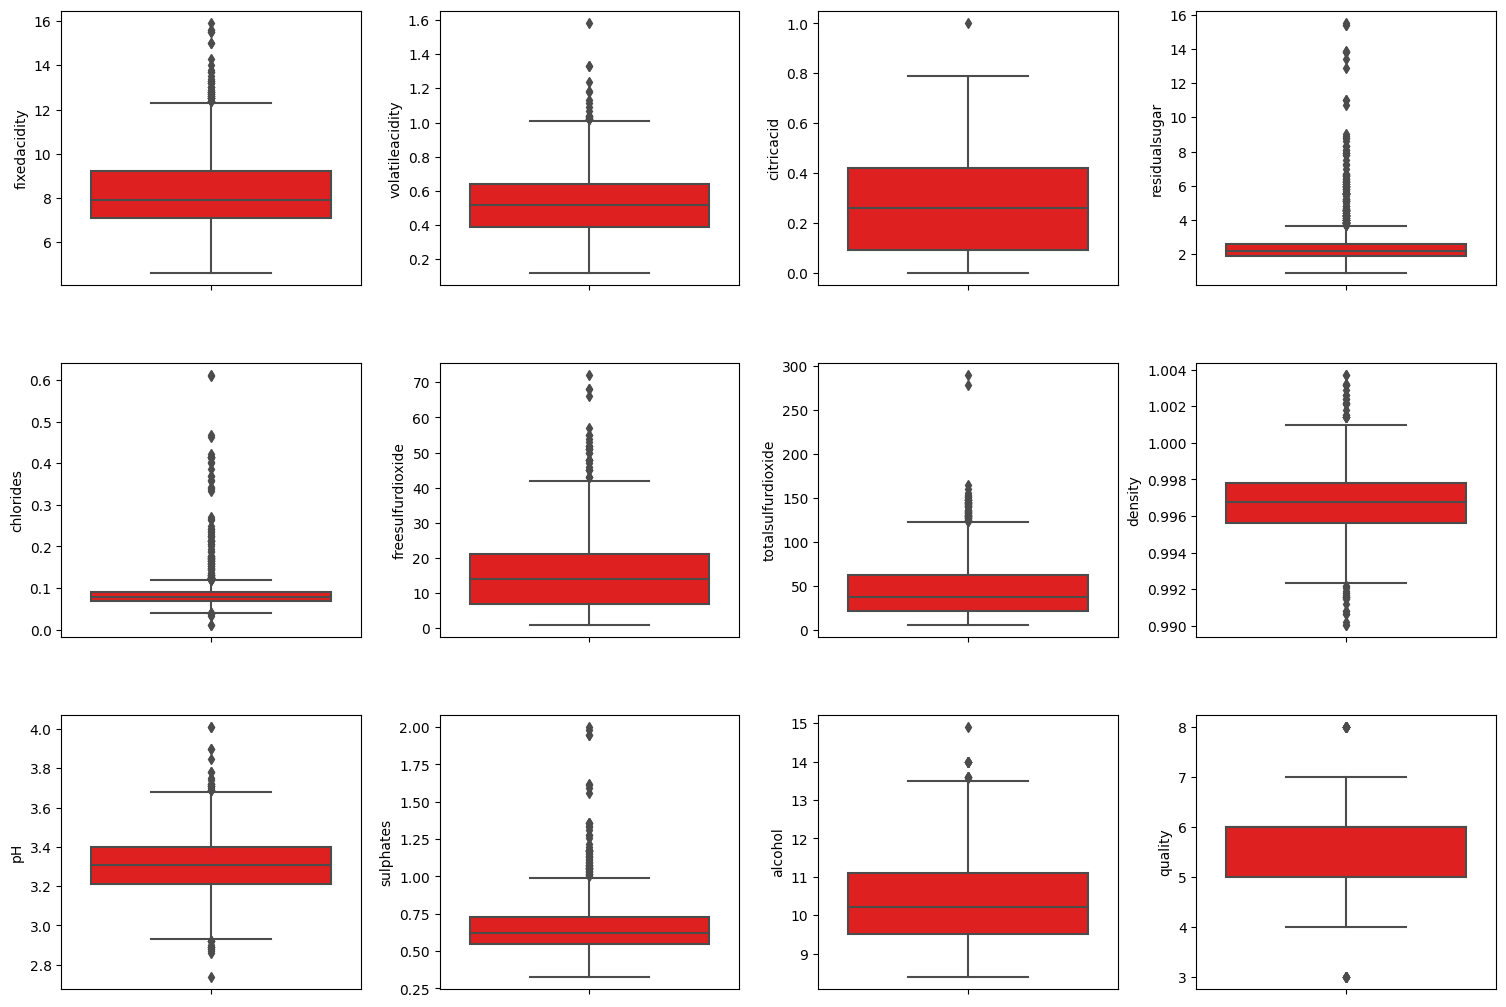

In [429]:
import seaborn as sns
fig,axis=plt.subplots(ncols=4,nrows=3,figsize=(15,10))
index=0
axis=axis.flatten()

for col,values in wine.items():
    sns.boxplot(y=col,data=wine,color='r',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [430]:
def outlier(data):
    df1=data.copy()
    data=data._get_numeric_data()
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    for col in data.columns:
        for i in range(0,len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
                
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
    
    for col in data.columns:
        df1[col]=data[col]
        
    return(df1)

df=outlier(wine)

C:\Users\Jaylo\AppData\Local\Temp\ipykernel_22172\4095858558.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound[col]
C:\Users\Jaylo\AppData\Local\Temp\ipykernel_22172\4095858558.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound[col]


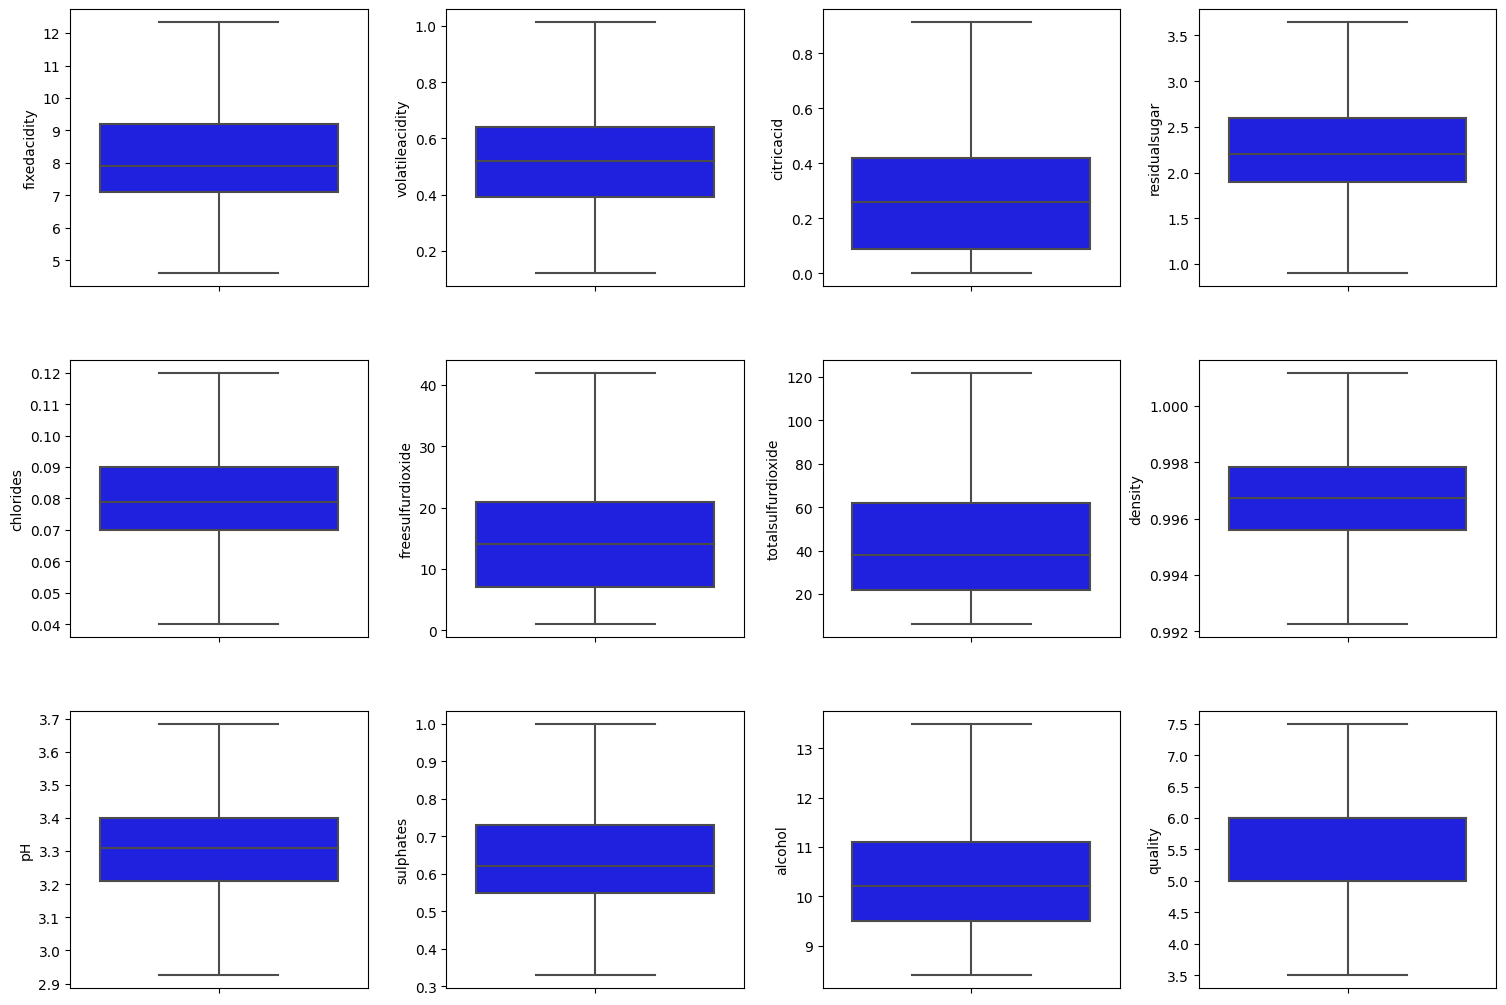

In [431]:
#Data after outlier removal
fig,axis=plt.subplots(ncols=4,nrows=3,figsize=(15,10))
index=0
axis=axis.flatten()

for col,values in df.items():
    sns.boxplot(y=col,data=df,color='b',ax=axis[index])
    index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [432]:
wine = df.drop(['fixedacidity', 'residualsugar', 'density', 'pH'], axis=1)
wine['quality'].value_counts()

columns = wine.columns.to_list()

columns = [c for c in columns if c not in ["quality", "id"]]

target = "quality"

X = wine[columns]
y = wine[target]

print(X.shape)
print(y.shape)

(1599, 7)
(1599,)


In [433]:
wine['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
7.5     18
3.5     10
Name: quality, dtype: int64

In [434]:
wine['good_quality']=["yes" if x>=7 else 'no' for x in wine['quality']]
wine.head(10)

,volatileacidity,citricacid,chlorides,freesulfurdioxide,totalsulfurdioxide,sulphates,alcohol,quality,good_quality
0,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5.0,no
1,0.88,0.00,0.098,25.0,67.0,0.68,9.8,5.0,no
2,0.76,0.04,0.092,15.0,54.0,0.65,9.8,5.0,no
3,0.28,0.56,0.075,17.0,60.0,0.58,9.8,6.0,no
4,0.70,0.00,0.076,11.0,34.0,0.56,9.4,5.0,no
5,0.66,0.00,0.075,13.0,40.0,0.56,9.4,5.0,no
6,0.60,0.06,0.069,15.0,59.0,0.46,9.4,5.0,no
7,0.65,0.00,0.065,15.0,21.0,0.47,10.0,7.0,yes
8,0.58,0.02,0.073,9.0,18.0,0.57,9.5,7.0,yes
9,0.50,0.36,0.071,17.0,102.0,0.80,10.5,5.0,no


In [435]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine['good_quality']=le.fit_transform(wine['good_quality'])

In [436]:
wine['good_quality'].value_counts()

0    1382
1     217
Name: good_quality, dtype: int64

In [437]:
X=wine.drop(['quality','good_quality'],axis=1)
y=wine['good_quality']

In [438]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2)

seed=5
scoring = 'accuracy'

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

X_train
y_train


(1279, 7) (320, 7)
(1279,) (320,)


494     0
991     0
172     0
434     0
1014    0
       ..
459     0
1260    0
1288    0
1428    0
1582    0
Name: good_quality, Length: 1279, dtype: int32

```
# Place your comments / conclusions / insight here
```


# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this wineset.

In [439]:
from sklearn.metrics import accuracy_score

In [511]:
RFCmodel = RandomForestClassifier()
RFCmodel.fit(X_train, y_train)
accuracy = RFCmodel.score(X_test, y_test)
print(f"The accuracy with Random Forest Classifier is {accuracy*100}%")

The accuracy with Random Forest Classifier is 90.9375%


In [441]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

acc_score1=accuracy_score(y_test,y_pred1)
print(f"The accuracy with Logistic Regression model is {acc_score1*100}%")

The accuracy with Logistic Regression model is 85.9375%


C:\Users\Jaylo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [442]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=3)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

acc_score2=accuracy_score(y_test,y_pred2)
print(f"The accuracy with KNN model is {acc_score2*100}%")

The accuracy with KNN model is 85.0%


# 6. Fine-tune your models and combine them into a great solution.

can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [520]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors=3)
model4 = KNeighborsClassifier(n_neighbors=5)
model5 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

acc_score3=accuracy_score(y_test,y_pred3)
acc_score4=accuracy_score(y_test,y_pred4)
acc_score5=accuracy_score(y_test,y_pred5)
print(f"The accuracy with KNN model K=3 is {acc_score3*100}% ,K=5 is {acc_score4*100}% ,K=7 is {acc_score5*100}%")

The accuracy with KNN model K=3 is 85.0% ,K=5 is 85.0% ,K=7 is 85.3125%


In [517]:
RFCmodel2 = RandomForestClassifier(max_depth=15, random_state=1)#15
RFCmodel2.fit(X_train, y_train)
accuracy2 = RFCmodel2.score(X_test, y_test)
print(f"The accuracy with Random Forest Classifier is {accuracy2*100}%")

The accuracy with Random Forest Classifier is 91.5625%


The accuracy with Logistic Regression model is 85.9375%


C:\Users\Jaylo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


```
# Place your comments / conclusions / insight here
```


# 7. Present your solution.

Explain why you would choose for a specific model

In [ ]:
# YOUR CODE HERE 

```
# Place your comments / conclusions / insight here
```


# 8. Launch, monitor, and maintain your system.

Deployment we will do in the next assignment!

# 9. Additional Questions

* Explain in detail how you think that the top 3 chosen algorithms work?
* Explain why you think that your chosen algorithm outperforms the rest? 

```
# Place your comments / conclusions / insight here
```
